nombre                                               geom
0    Parcela 5  MULTIPOLYGON (((272485.546 4462262.205, 272440...
1    Parcela 7  MULTIPOLYGON (((271824.706 4462385.101, 271815...
2   Parcela 10  MULTIPOLYGON (((270620.130 4462116.210, 270598...
3    Parcela 4  MULTIPOLYGON (((272231.759 4462418.849, 272249...
4    Parcela 2  MULTIPOLYGON (((271227.646 4463523.923, 271231...
5    Parcela 3  MULTIPOLYGON (((271319.648 4463413.251, 271305...
6    Parcela 6  MULTIPOLYGON (((272486.551 4462208.686, 272453...
7    Parcela 8  MULTIPOLYGON (((271655.140 4462504.209, 271634...
8    Parcela 9  MULTIPOLYGON (((270883.030 4462212.138, 270897...
9    Parcela 1  MULTIPOLYGON (((271162.738 4463641.881, 271149...
10  Parcela 15  MULTIPOLYGON (((271263.670 4463061.485, 271317...
11  Parcela 14  MULTIPOLYGON (((271836.109 4462719.992, 271827...
12  Parcela 13  MULTIPOLYGON (((271747.035 4462476.586, 271763...
13  Parcela 12  MULTIPOLYGON (((271959.915 4462233.664, 271984...
14  Parcela 11  MULTIPOLYGON (((272334.248 4461974.144, 272334...

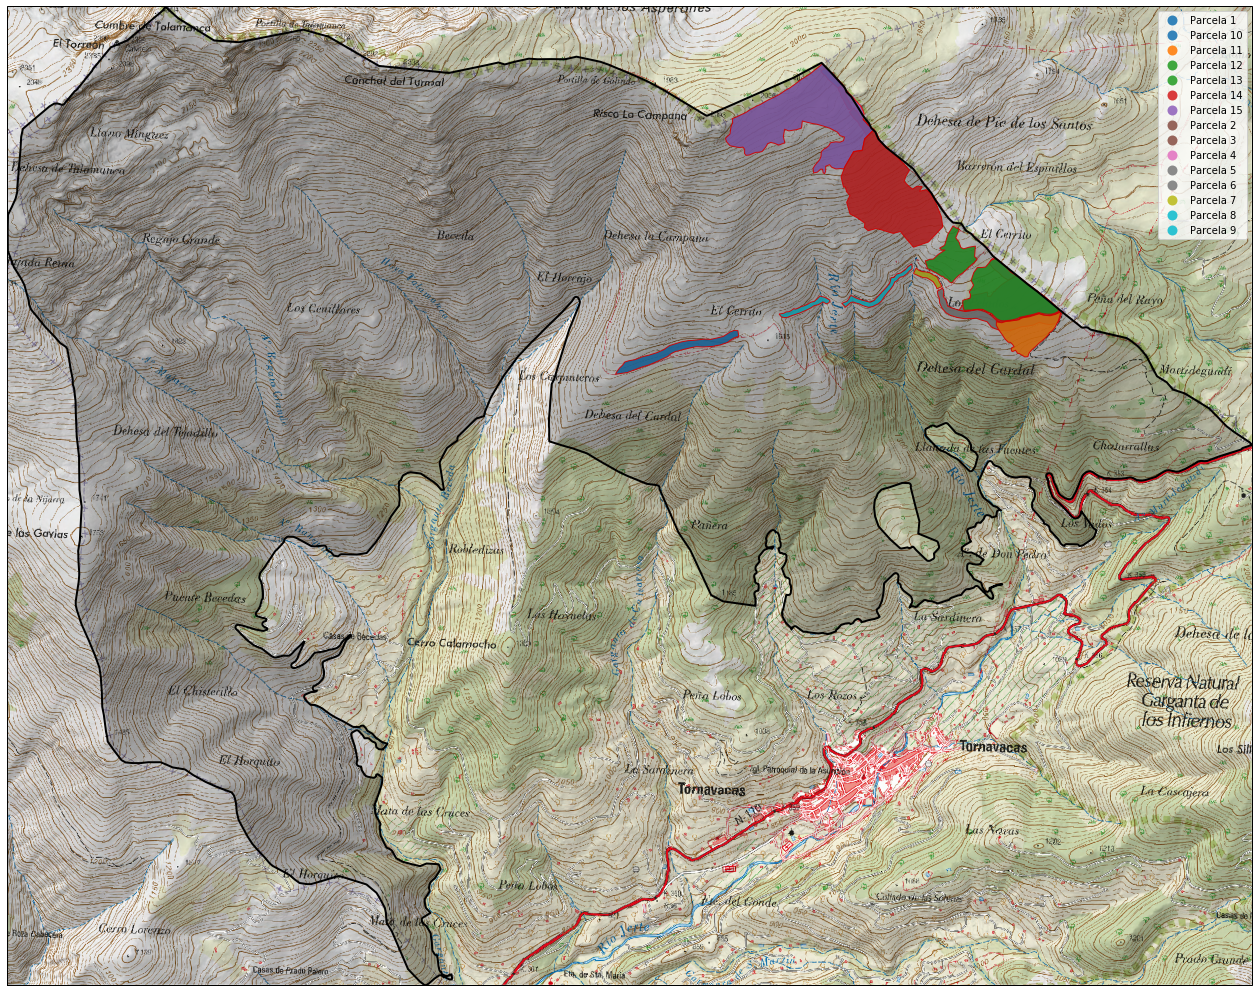

In [1]:
import psycopg2
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from config import config

zona = 'tornavacas'
params = config()
conn = psycopg2.connect(**params)

ze = gpd.read_postgis('select * from zona_estudio_{}'.format(zona), conn)
parcelas = gpd.read_postgis('select nombre, st_transform(geom, 25830) as geom from quema_{}_todas'.format(zona), conn)

proj = ccrs.epsg('25830')

fig = plt.figure(figsize=(24,18))
ax = plt.axes(projection=proj)
lim = ze.bounds
ax.set_extent([lim['minx'],lim['maxx'], lim['miny'], lim['maxy']], crs=proj)
ax.add_geometries(ze.loc[[0], 'geom'], facecolor='#00000030', linewidth=2, edgecolor='black', crs=proj)
display(parcelas)
ax.add_wms(wms='https://www.ign.es/wms-inspire/mapa-raster', layers=['mtn_rasterizado'])

parcelas.plot(column=parcelas['nombre'], alpha=0.9, edgecolor='red', linewidth=1, ax=ax, legend=True)

fig.savefig('static/images_quemas/parcelas_{}'.format(zona), bbox_inches='tight', pad_inches=0)
plt.show()
plt.close(fig)

conn.close()